## Самостоятельная работа. Оценка прочости бетона с помощью ML LinearRegression

#### Состав типового домашнего задания дисциплине Математические методы обработки больших данных:
Содержание работы:

	1. Провести первичный анализ данных concrete_data.csv
	2. Выявить наличие ошибочных данных.
	3. Выявить наличие выбросов.
	4. Отфильтровать данные.
	5. Определить характеристики для построения модели.
	6. На освнове состава и сорках твердения бетона построить модель прочности бетона.
	7. Оценить ее качество.
	8. Представить полученные результаты.


#### Создать модель, которая будет предсказывать прочности бетона по его характеристикам файл concrete_data.csv
Состав:
   1. Цемент
   2. Доменный шлак
   3. Зола уноса
   4. Вода
   5. Суперпластификатор
   6. Крупный заполнитель
   7. Песок
   8. Возраст
   9. Прочность - целевая переменная

In [1]:
import pandas as pd #библиотека для работы с наборми данных
import numpy as np  #то же для выполнения математических операций
import seaborn as sns # графическое изображение данных
import matplotlib.pyplot as plt # тоже

from sklearn.model_selection import train_test_split # библиотека для тренировки выборки
from sklearn.linear_model import LinearRegression # создание регрессионной линеной модели


from sklearn.metrics import r2_score, mean_squared_error # использование метрик для оценки достоверности модели
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../concrete_data.csv') # набор данных загружаемый с файла CSV
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
df.info() # информация о фрейме данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
df.describe() #дополнительные сведения

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


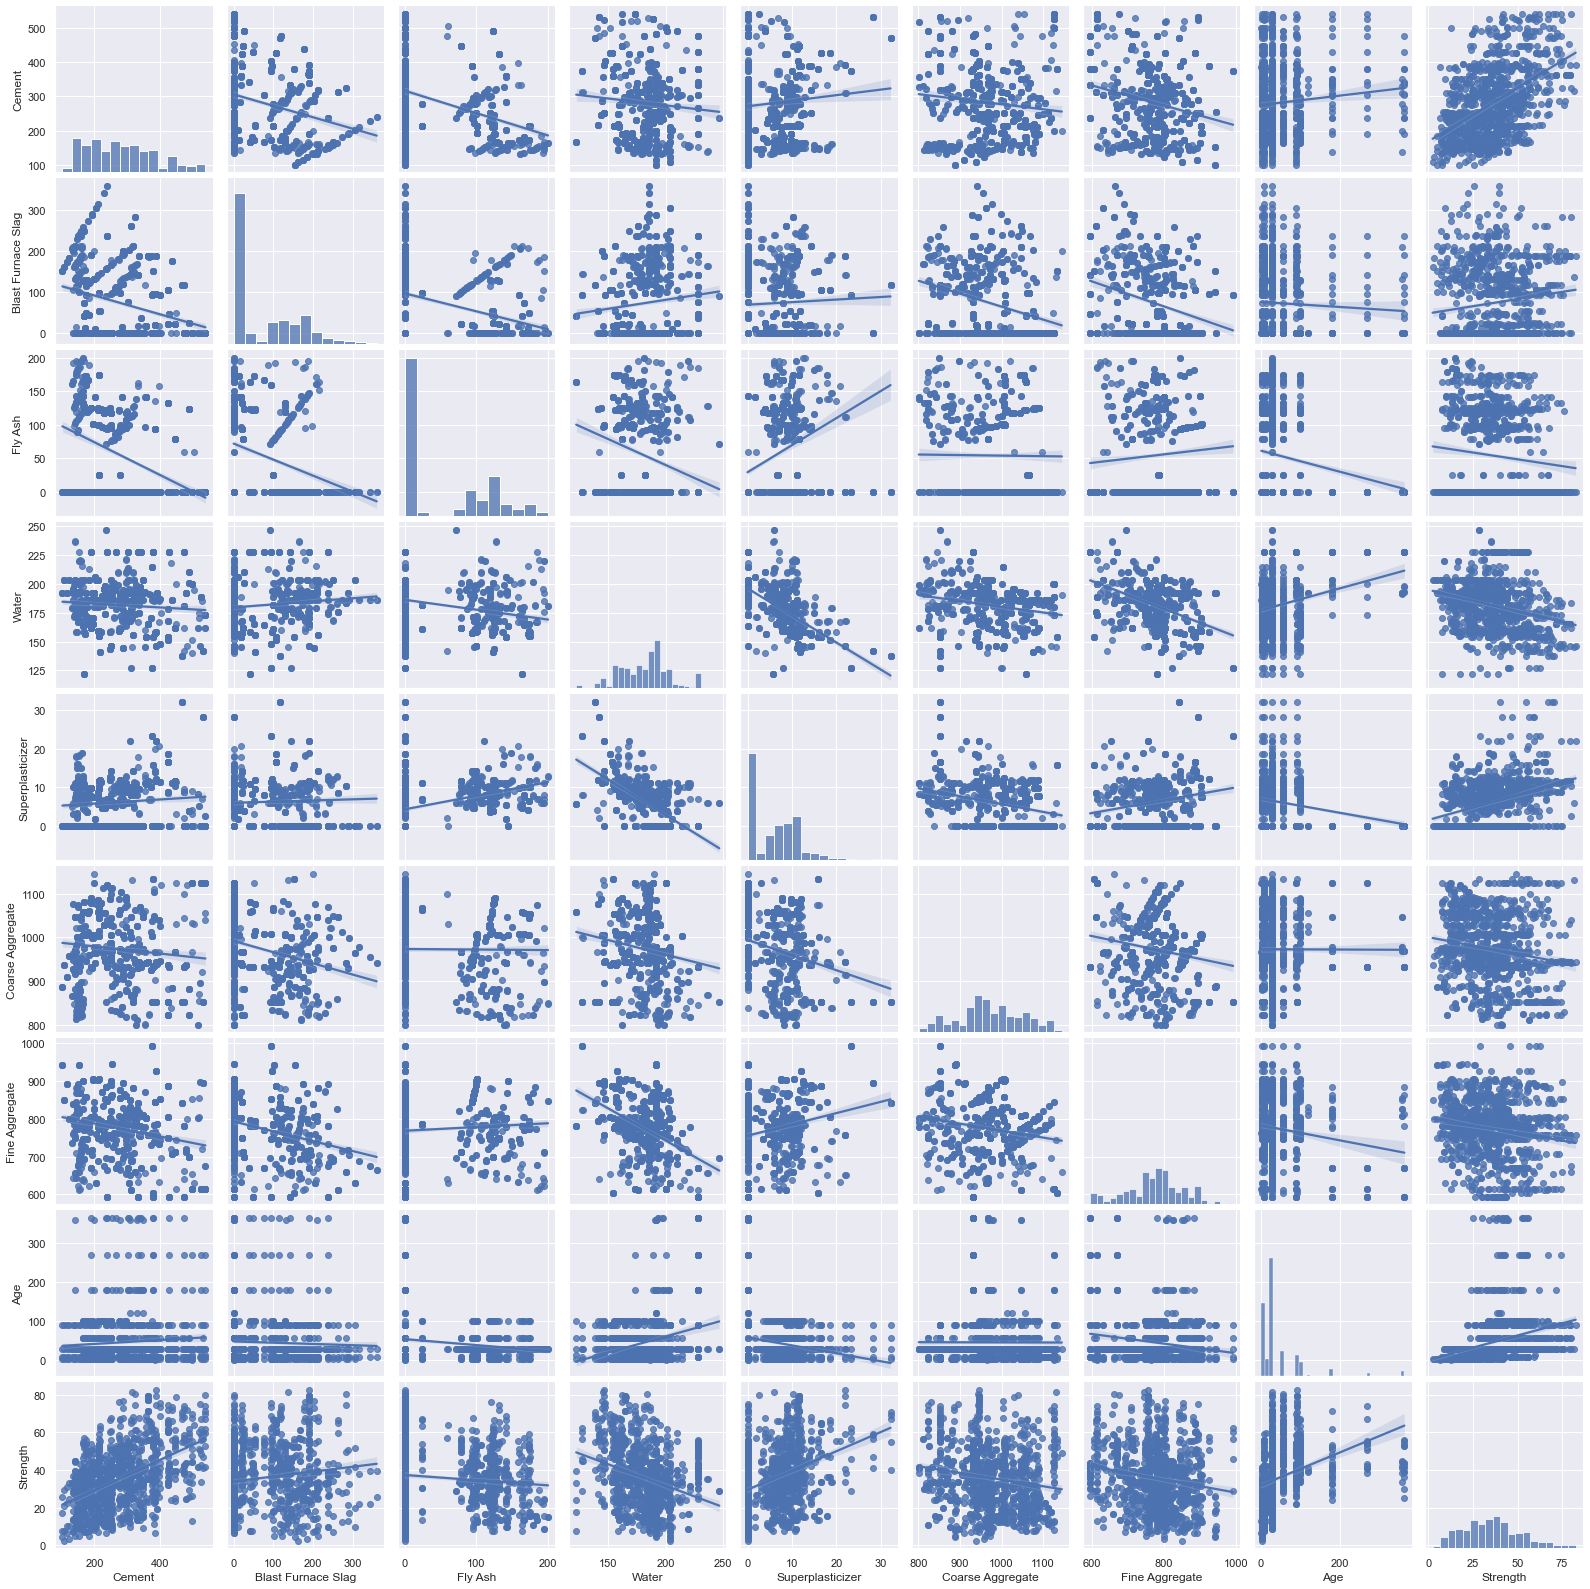

In [5]:
sns.set()
pic = sns.pairplot(df, kind='reg')
pic.savefig("pairplot.png")

In [8]:
corr = df.corr() # корреляционная таблица для получения сведений о взаимной корреляции между столбцами фрейма
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


## По полученным графикам и таблицам анализируем взимозависимость данных друг от друга
Видно что каждый из параметров не сильно влияет на другой, в то же время нет параметра незначительно влияющего на целевую функцию, следовательно принимаем решение оставить все исходные данные для дальнейшего анализа

Пишем функцию для того что бы для каждого столбца удалить выборсы, далее применяем функцию на каждый столбец

<Figure size 1440x1440 with 0 Axes>

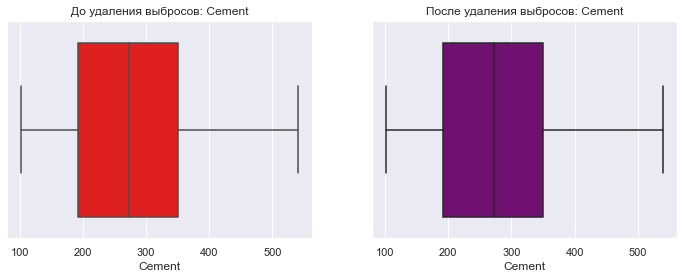

<Figure size 1440x1440 with 0 Axes>

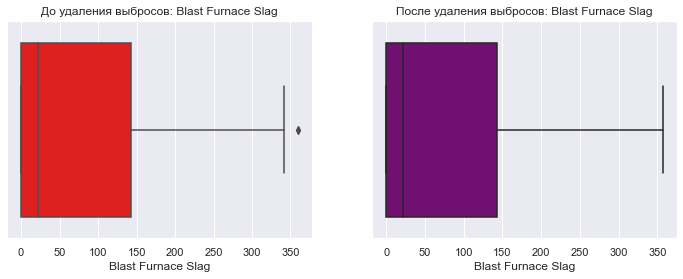

<Figure size 1440x1440 with 0 Axes>

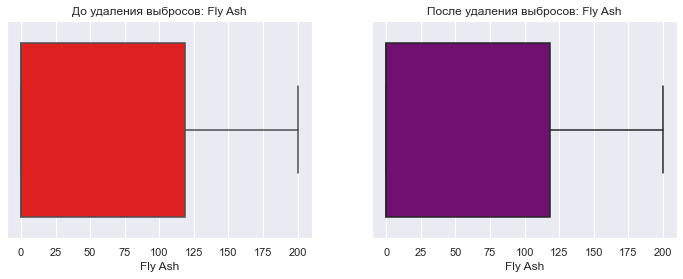

<Figure size 1440x1440 with 0 Axes>

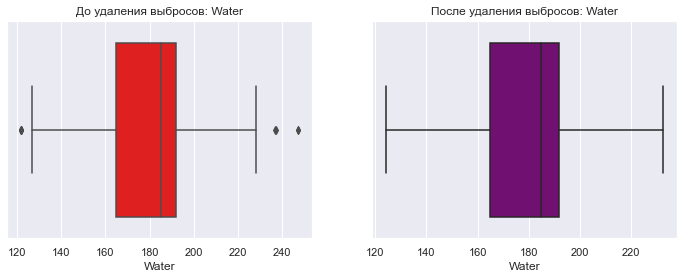

<Figure size 1440x1440 with 0 Axes>

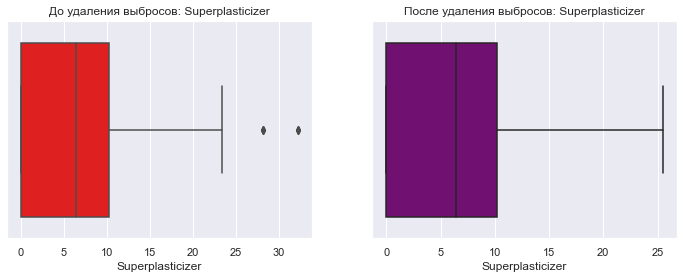

<Figure size 1440x1440 with 0 Axes>

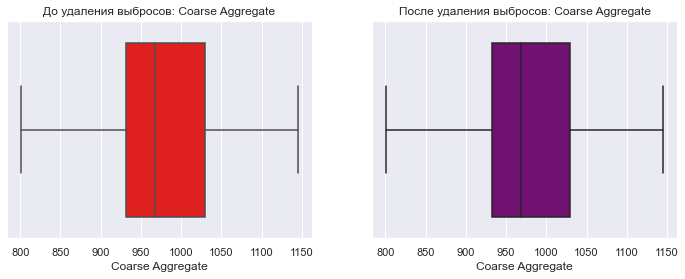

<Figure size 1440x1440 with 0 Axes>

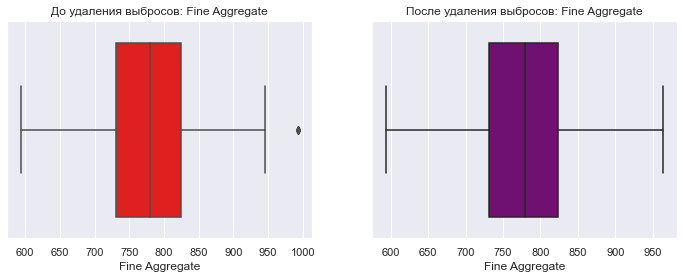

<Figure size 1440x1440 with 0 Axes>

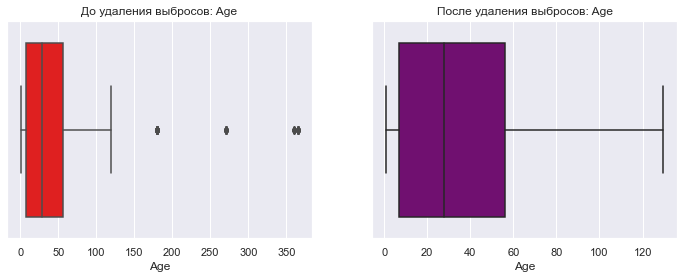

In [12]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='red').set_title("До удаления выбросов: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='purple').set_title("После удаления выбросов: "+col_name)
    print()
    plt.show()
    return df

for col in df.select_dtypes(exclude="object").columns[:-1]:
    df = remove_outlier(df,col)

Отделяем данные от целевой функции

In [13]:
X = df.drop("Strength", axis = 1).values
Y = df["Strength"]

Разбиваем данные на тестировочную выборку и тренировочную

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 4, test_size = 0.3)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape) # выводим размеры получившихся матриц после разбития данных

(721, 8) (721,) (309, 8) (309,)


Пишем функцию построения модели и проверки её достоверности с помощью метрик 

In [17]:
def model_train(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Коэффициент детерминации :", r2_score(Y_test, Y_pred))
    print("Средняя квадратичная ошибка :", mean_squared_error(Y_test, Y_pred))
    print("Средняя ошибка :", mean_squared_error(Y_test, Y_pred)**0.5)
    sns.regplot(Y_test, Y_pred)

Коэффициент детерминации : 0.7169162755604069
Средняя квадратичная ошибка : 83.91953664961635
Средняя ошибка : 9.160760702562662


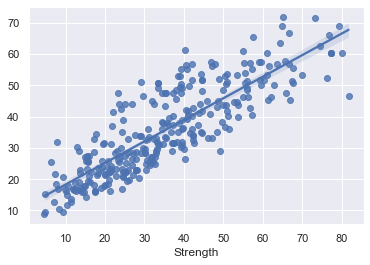

In [18]:
model_train(LinearRegression(), X_train, X_test, Y_train, Y_test)

# Вывод

1. В данной работе произведена попытка анализа прочности бетона от входящих в его состав ингридиентов: цементирующие материалы, песок, вода, крупный заполнитель, пластификатор, а так же сроки его твердения;
2. Получена модель линейной регрессии с коэффициентом детерминации 0.71 - что является хорошим результатом
3. При анализе было выявлено что выборка яляется качественной - отсутствуют NaN значения в всех столбцах, все столбцы нужны для анализа прочности бетона